In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from numpy import log
import pandas as pd
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
import pmdarima as pm
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns

In [3]:
# from dateutil.parser import parse 
# import matplotlib as mpl
# # import matplotlib.pyplot as plt
# import seaborn as sns
# # import numpy as np
# # import pandas as pd
# plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# # Import as Dataframe
# # df_1 = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'])
# # df_1.head()
# df = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'])
# # df.head()

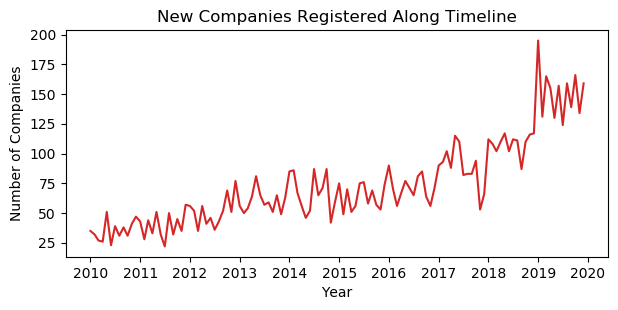

In [29]:
# Visualizing original time series
df = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Number of Companies', dpi=100):
    plt.figure(figsize=(7,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='New Companies Registered Along Timeline')   

In [25]:
# Calculate outliers
import numpy as np
def removeOutliers(x, outlierConstant):
    a = np.array(x)
upper_quartile = np.percentile(a,75)
lower_quartile = np.percentile(a,25)
IQR = (upper_quartile - lower_quartile) * outlierConstant
quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
resultList = []
for y in a.tolist():
    if y >= quartileSet[0] and y <= quartileSet[1]:
       resultList.append(y)
    return resultList

NameError: name 'a' is not defined

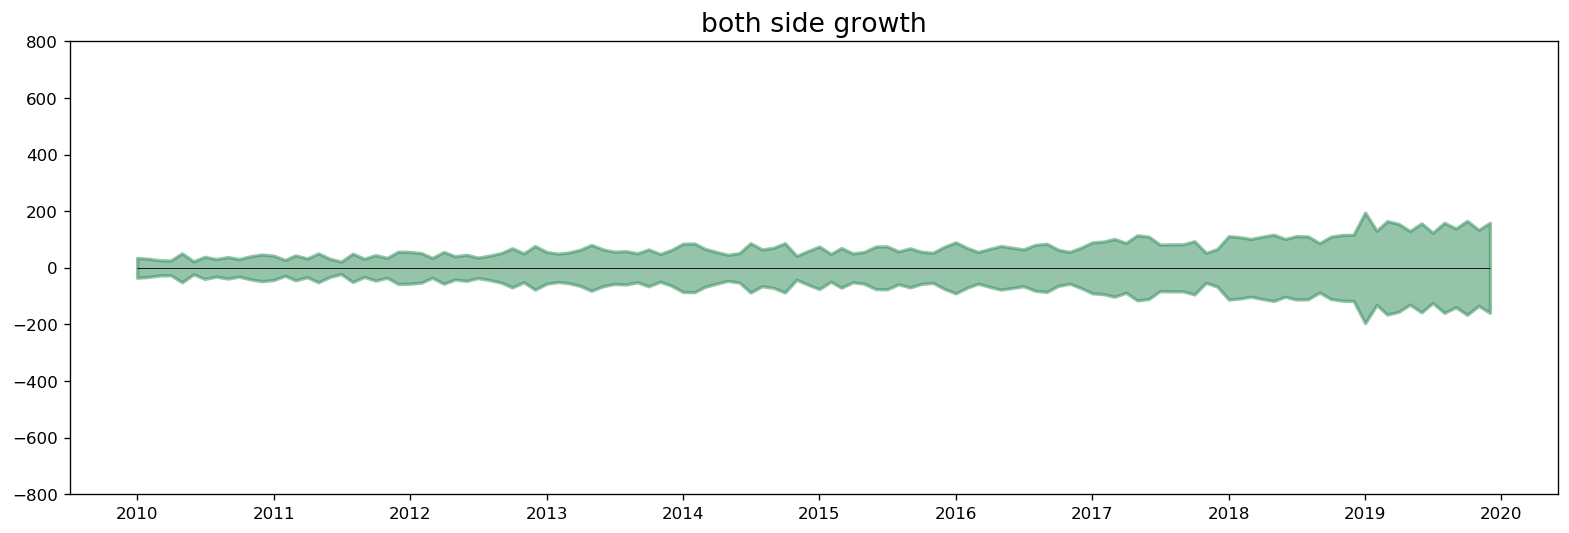

In [59]:
# # Import data
# df = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'])
# x = df['date'].values
# y1 = df['value'].values

# # Plot
# fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
# plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
# plt.ylim(-800, 800)
# plt.title('both side growth', fontsize=16)
# plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
# plt.show()

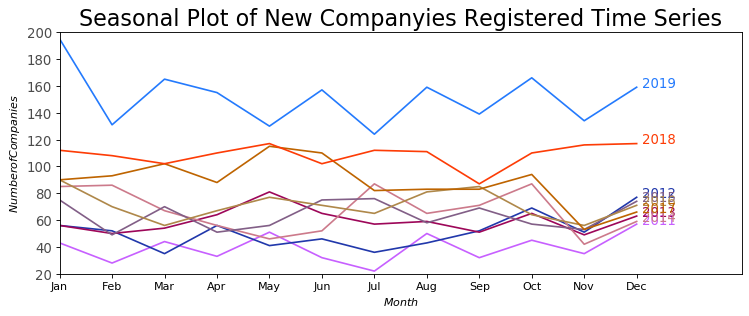

In [11]:
# Seasonal Plot of a time series

# Import Data
df = pd.read_csv('2010_zip_1_monthly_data_date.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(11,4), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(0, 13), ylim=(20, 200), ylabel='$Number of Companies$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of New Companyies Registered Time Series", fontsize=20)
plt.show()

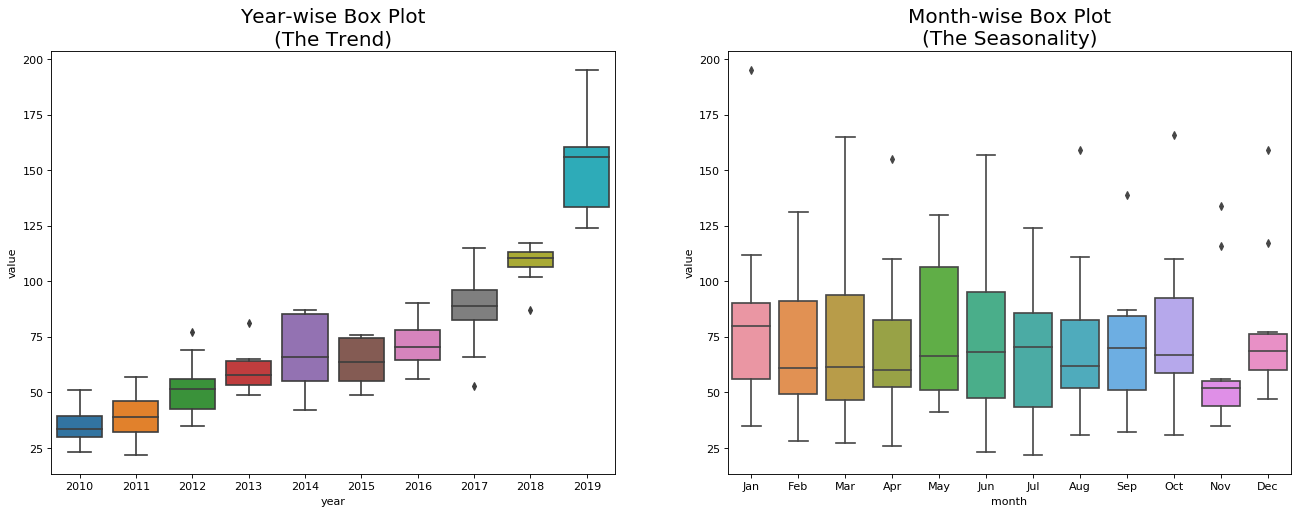

In [60]:
# Import Data
df = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

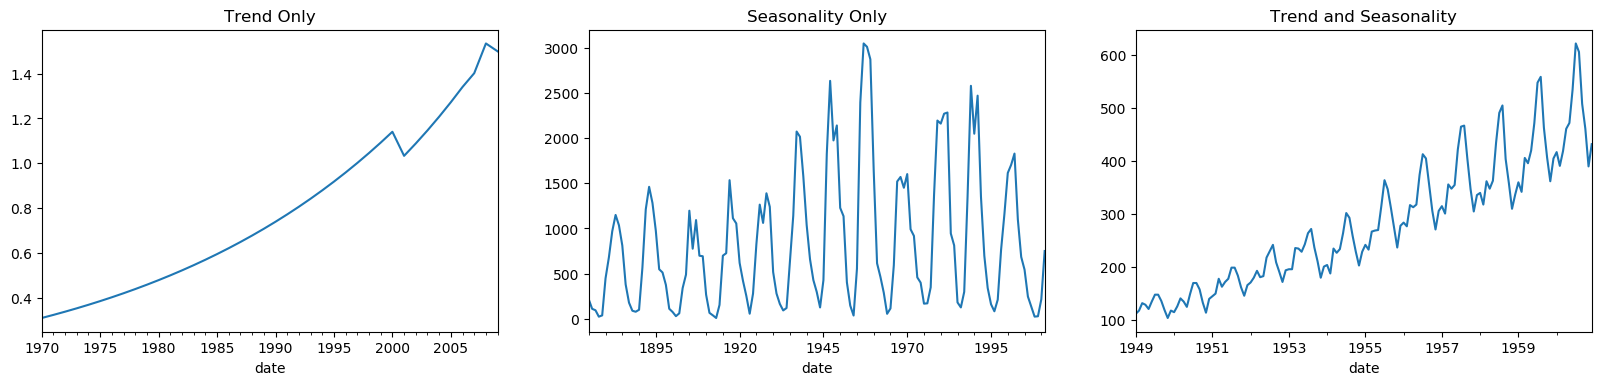

In [61]:
# Base-trend, seasonality-only, and tread with seasonality comparison
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

In [62]:
# Use differencing test packege to check if our data time series stationary (p<=0.0.5)
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 2.625523811143773
p-value: 0.9990794409774549
Critial Values:
   1%, -3.4924012594942333
Critial Values:
   5%, -2.8886968193364835
Critial Values:
   10%, -2.5812552709190673

KPSS Statistic: 0.857514
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


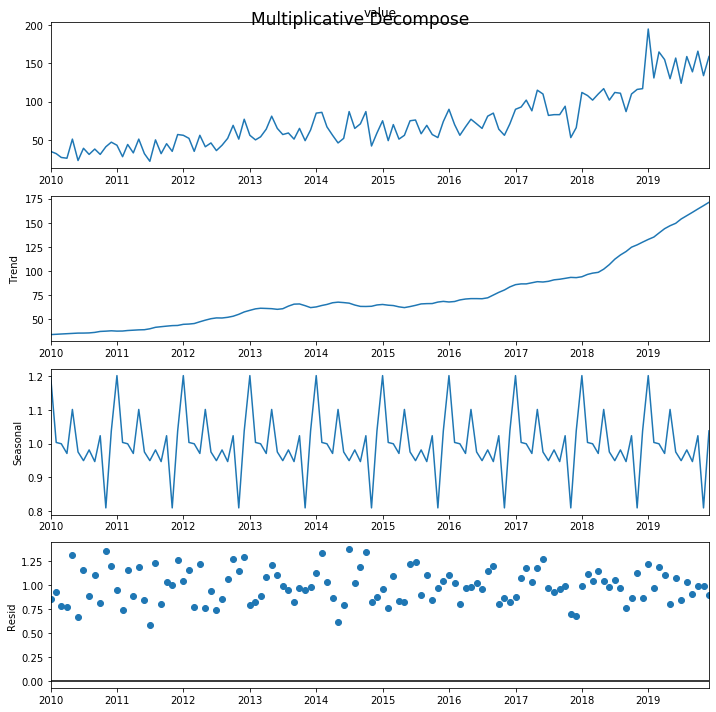

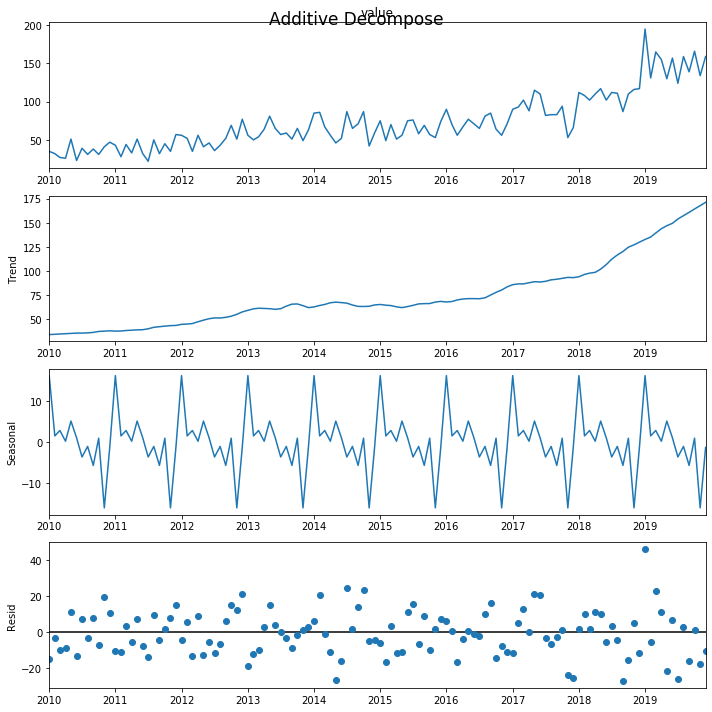

In [26]:
# Time series decomposed into its components
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=17)
result_add.plot().suptitle('Additive Decompose', fontsize=17)
plt.show()

In [27]:
# Use the augmented Dickey Fuller test to determine the minimum number of differencing d value for ARIMA model
result = adfuller(df.value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.625524
p-value: 0.999079


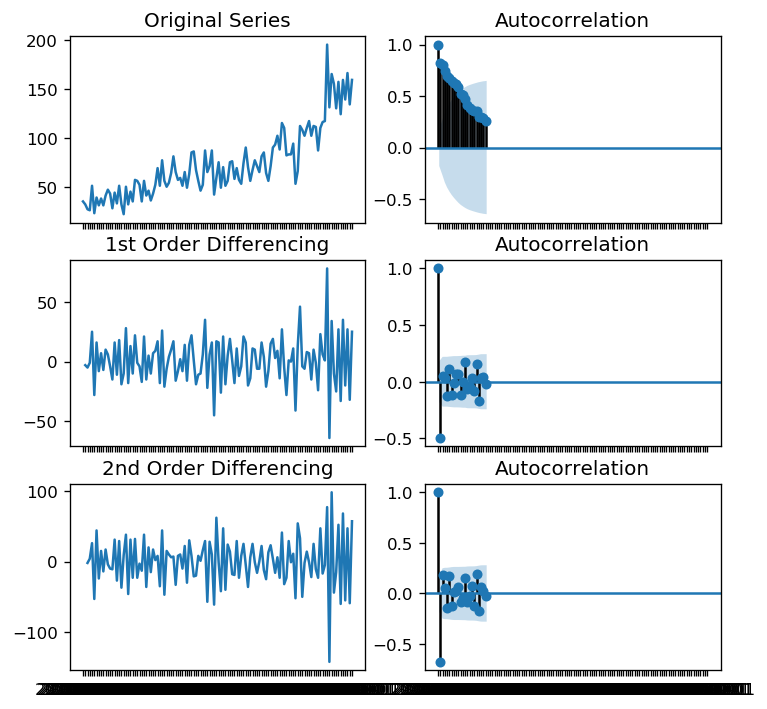

In [35]:
# Find the order of the AR term (p): The lags of y to be used as predictor

# Read in data
df = pd.read_csv('2010_zip_1_monthly_data.csv', names=['value'], header=0)

plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [72]:
# # Use number of difference test package to test if our time series stationary
# from pmdarima.arima.utils import ndiffs

# y = df.value

# # Adf Test
# ndiffs(y, test='adf')  

# # KPSS test
# ndiffs(y, test='kpss')  

# # PP test:
# ndiffs(y, test='pp')  

0

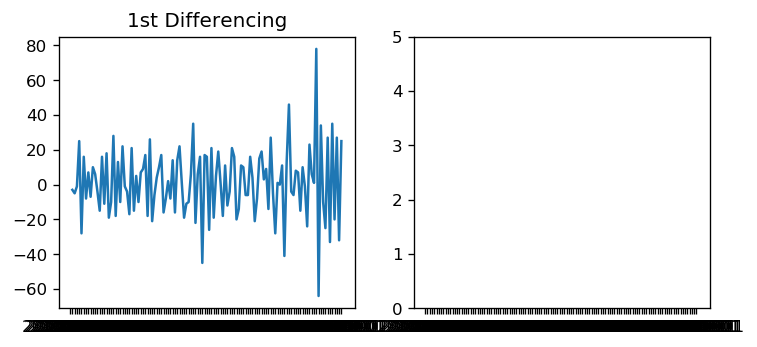

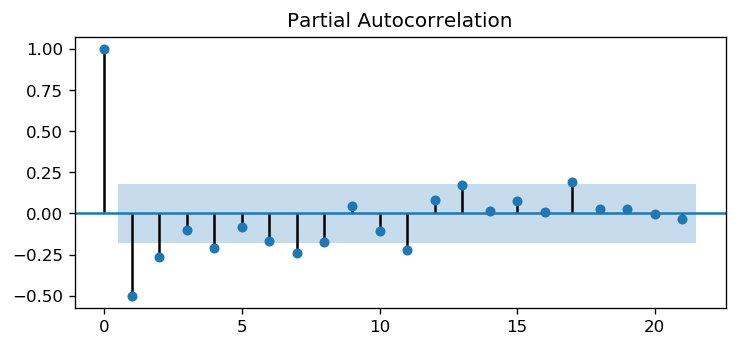

In [73]:
# Use partial autocorrelation function (PACF) to inspect for AR lag(s)
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna())

plt.show()

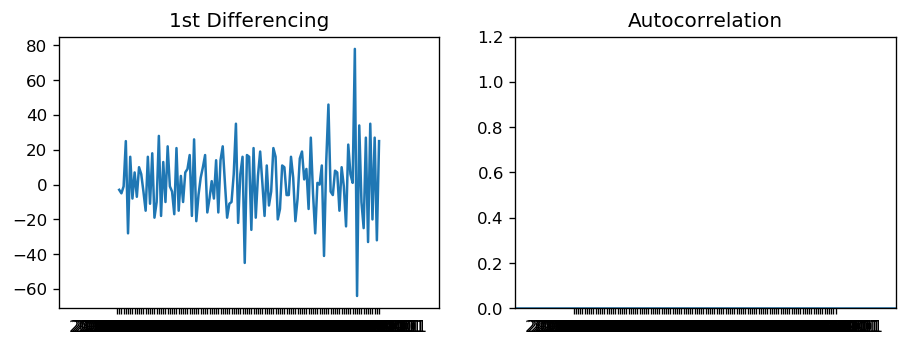

In [75]:
# Find the order of the MA term (q): number of laggerd forecast error that need to go to the model
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff(), ax=axes[1])

plt.show()

In [77]:
# Build ARIMA Model1, d=1, AR=1, MA=1
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -497.292
Method:                       css-mle   S.D. of innovations             15.739
Date:                Tue, 31 Mar 2020   AIC                           1002.584
Time:                        00:27:25   BIC                           1013.701
Sample:                    02-01-2010   HQIC                          1007.098
                         - 12-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0188      0.324      3.145      0.002       0.384       1.654
ar.L1.D.value     0.0478      0.115      0.415      0.678      -0.178       0.273
ma.L1.D.value    -0.7931      0.069    -

In [78]:
# Building ARIMA Model2, d=1, AR=0, MA=1
model = ARIMA(df.value, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: R

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -505.763
Method:                       css-mle   S.D. of innovations             16.177
Date:                Tue, 31 Mar 2020   AIC                           1019.527
Time:                        00:27:44   BIC                           1030.677
Sample:                    01-01-2010   HQIC                          1024.055
                         - 12-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          87.0260     44.677      1.948      0.051      -0.540     174.592
ar.L1.value     0.9947      0.007    137.774      0.000       0.981       1.009
ma.L1.value    -0.6786      0.069     -9.791    

In [79]:
# Building ARIMA Model3, d=0, AR=0, MA=1
model = ARIMA(df.value, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  119
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -497.377
Method:                       css-mle   S.D. of innovations             15.750
Date:                Tue, 31 Mar 2020   AIC                           1000.755
Time:                        00:27:52   BIC                           1009.092
Sample:                    02-01-2010   HQIC                          1004.140
                         - 12-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0192      0.335      3.042      0.002       0.363       1.676
ma.L1.D.value    -0.7748      0.061    -12.806      0.000      -0.893      -0.656
                                    Root

C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


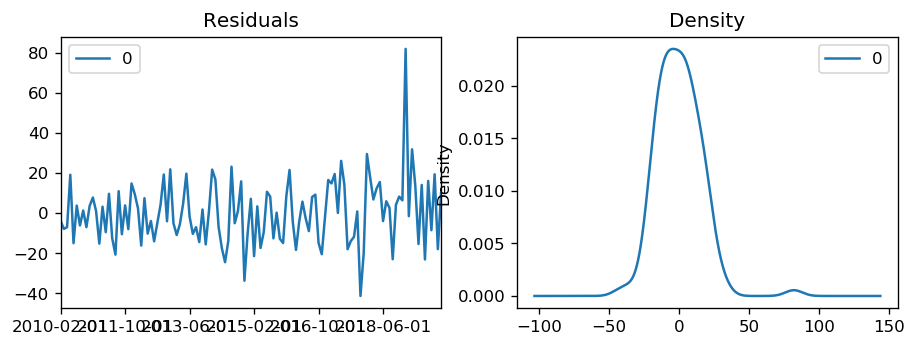

In [80]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

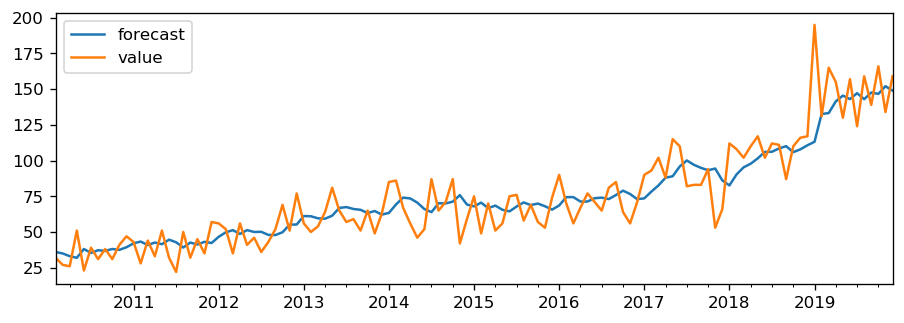

In [81]:
# Actual vs Fitted predict plot
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\foxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   98
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -390.959
Method:                       css-mle   S.D. of innovations             12.796
Date:                Tue, 31 Mar 2020   AIC                            789.918
Time:                        00:28:20   BIC                            800.258
Sample:                    02-01-2010   HQIC                           794.100
                         - 03-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5965      0.056     10.593      0.000       0.486       0.707
ar.L1.D.value     0.2070      0.100      2.075      0.038       0.011       0.403
ma.L1.D.value    -1.0000      0.032    -

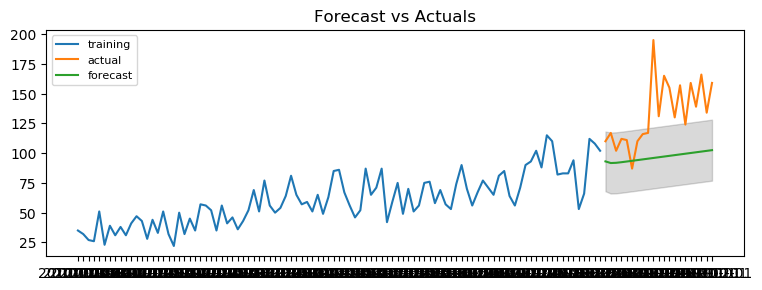

In [82]:
# Create Training and Testing sets 
train = df.value[:99]
test = df.value[99:]

# Build ARIMA Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(21, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(9,3), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [37]:
# Create auto arima forecasting model
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('2010_zip_1_monthly_data.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1002.584, BIC=1013.700, Time=0.505 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1050.847, BIC=1056.405, Time=0.043 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1018.878, BIC=1027.216, Time=0.247 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1000.754, BIC=1009.092, Time=0.188 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1049.180, BIC=1051.959, Time=0.051 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1002.616, BIC=1013.732, Time=0.388 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1002.036, BIC=1015.931, Time=0.527 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 2.001 seconds
                               SARIMAX Results                                
Dep

In [4]:
# 13

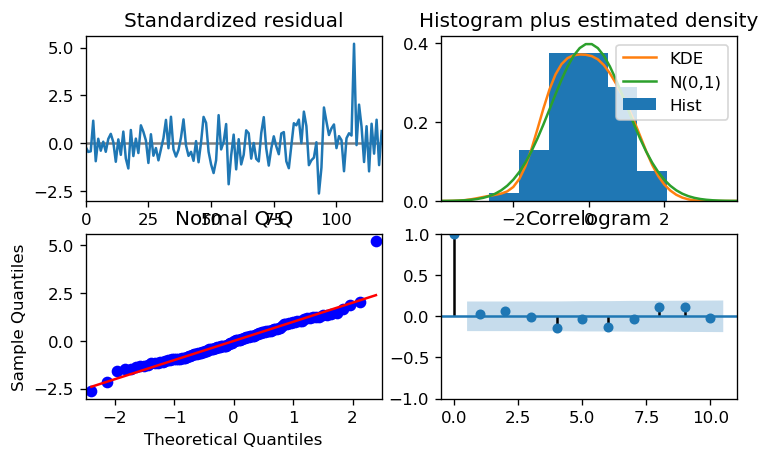

In [42]:
model.plot_diagnostics(figsize=(7,4))
plt.show()

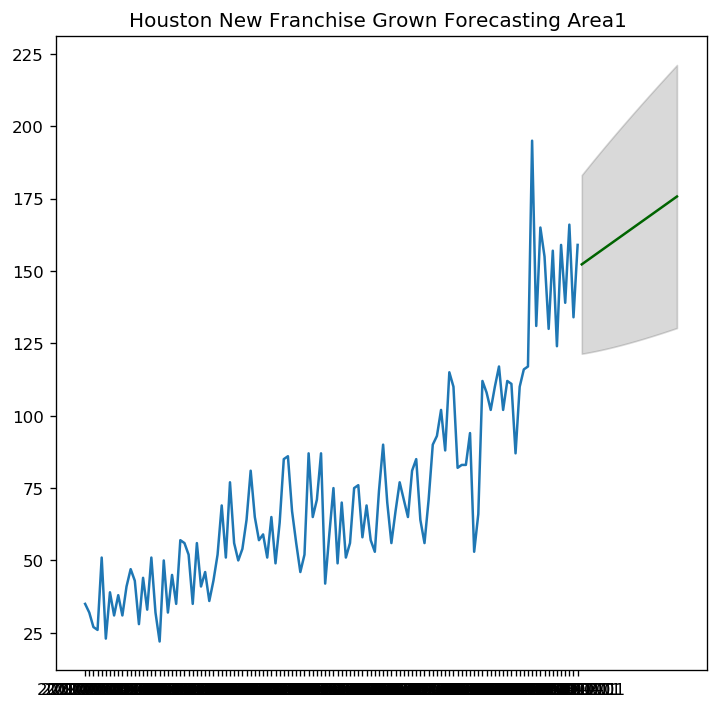

In [41]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Houston New Franchise Grown Forecasting Area1 ")
plt.show()

In [9]:
#14

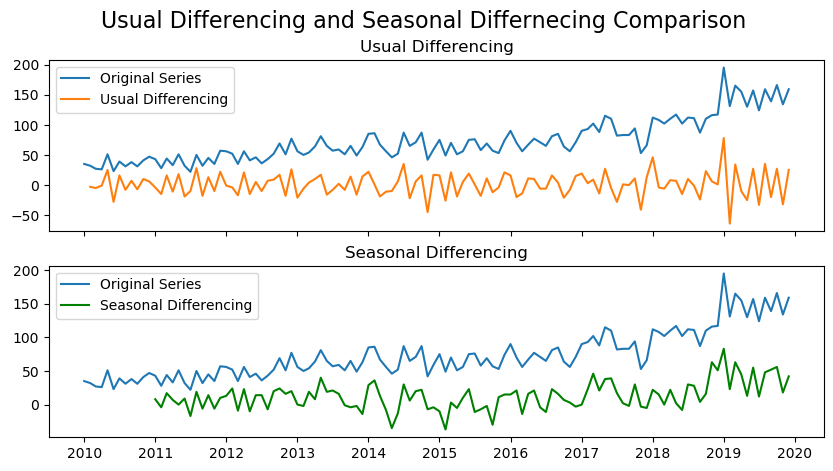

In [43]:
# Import
data = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Usual Differencing and Seasonal Differnecing Comparison', fontsize=16)
plt.show()

In [46]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=907.492, BIC=920.856, Time=2.036 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=978.751, BIC=984.097, Time=0.067 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=930.620, BIC=941.312, Time=1.313 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=905.682, BIC=916.373, Time=1.016 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=976.771, BIC=979.444, Time=0.043 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=932.747, BIC=940.766, Time=0.217 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=907.663, BIC=921.027, Time=2.091 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 2, 12) (constant=True); AIC=907.666, BIC=921.030, Time=3.106 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=912.483, BIC=923.175, Time=0.793 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 2, 12) (constant=True); AIC=909.133, BIC=925.170, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -448.841
Date:                            Tue, 31 Mar 2020   AIC                            905.682
Time:                                    03:58:14   BIC                            916.373
Sample:                                         0   HQIC                           910.016
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2512      0.144      1.743      0.081      -0.031       0.534
ma.L1         -0.7883      0.060    -13.178      0.000      -0.906      -0.671
ma.S.L12      -0.6618      0.114     -5.793      0.000      -0.886      -0.438
sigma2       239.2016     29.020      8.243      0.000     182.323     296.081
===================================================================================
Ljung-Box (Q):                       35.56   Jarque-Bera (JB):                 6.70
Prob(Q):                              0.67   Prob(JB):                         0.04
Heteroskedasticity (H):               2.93   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

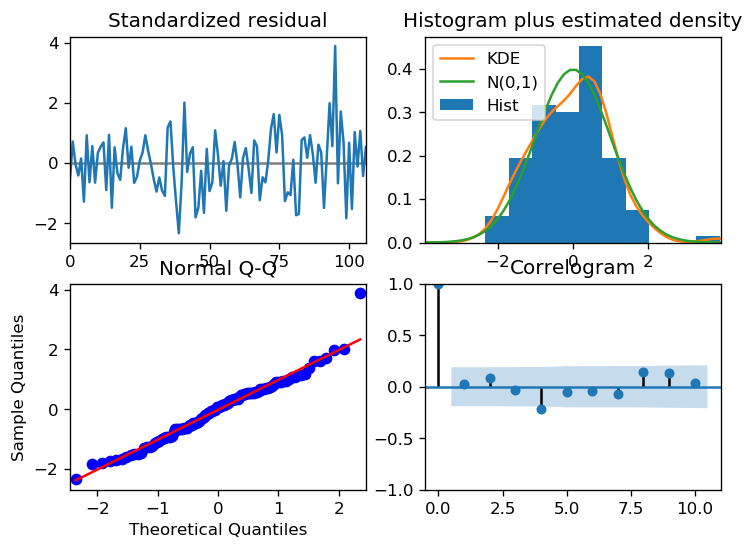

In [47]:
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

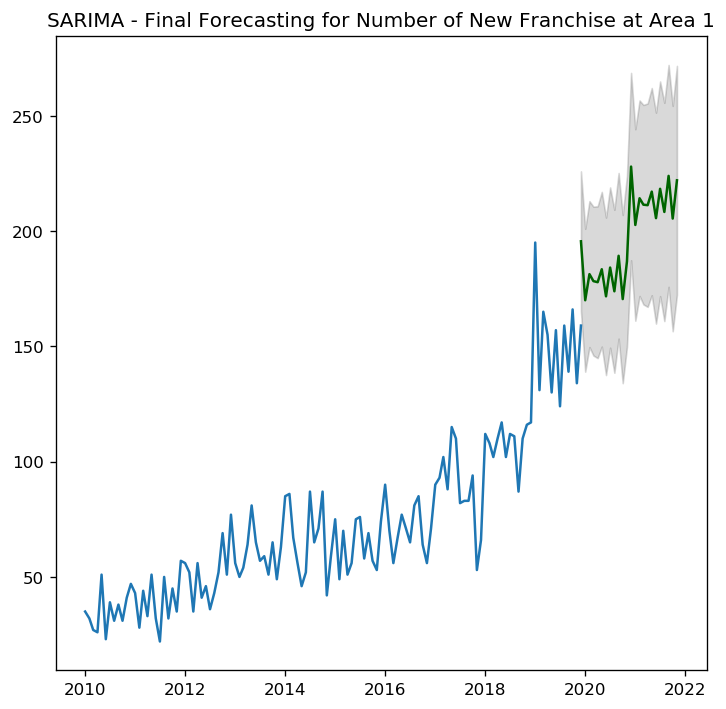

In [48]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecasting for Number of New Franchise at Area 1")
plt.show()

In [15]:
#15

In [51]:
# Compute Seasonal Index

# Import Data
data = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'], index_col='date')

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=918.174, BIC=934.267, Time=3.504 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=966.778, BIC=974.824, Time=0.223 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=941.173, BIC=954.583, Time=1.500 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=950.824, BIC=964.234, Time=1.369 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=1000.269, BIC=1005.633, Time=0.329 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=944.595, BIC=958.005, Time=0.877 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=920.172, BIC=938.947, Time=3.500 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=920.172, BIC=938.947, Time=11.338 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 0, 12) (constant=True); AIC=925.270, BIC=941.363, Time=2.205 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=921.760, BIC=943.217, Ti

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -453.087
Date:                            Tue, 31 Mar 2020   AIC                            918.174
Time:                                    04:02:54   BIC                            934.267
Sample:                                01-01-2010   HQIC                           924.699
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.3065      0.513      0.597      0.550      -0.699       1.312
seasonal_index    -0.0007   3.99e+04  -1.77e-08      1.000   -7.82e+04    7.82e+04
ar.L1              0.9776      0.046     21.096      0.000       0.887       1.068
ma.L1             -0.7318      0.097     -7.582      0.000      -0.921      -0.543
ma.S.L12          -0.6761      0.115     -5.901      0.000      -0.901      -0.452
sigma2           241.0973     29.747      8.105      0.000     182.794     299.401
===================================================================================
Ljung-Box (Q):                       35.42   Jarque-Bera (JB):                 8.76
Prob(Q):                              0.68   Prob(JB):                         0.01
Heteroskedasticity (H):               3.27   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""